### Classification with Naive Bayes

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\marre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
data = load_iris()
print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [12]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
X = data["data"]

In [13]:
Y = data['target']
labels = list(data['target_names'])
print(labels)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


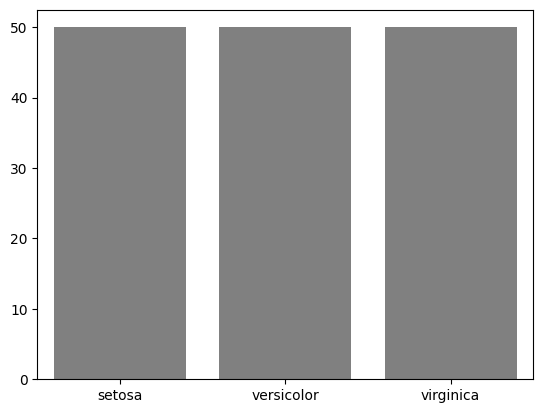

In [30]:
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()
sns.barplot(x=labels, y=table.values, color='gray')
plt.show()

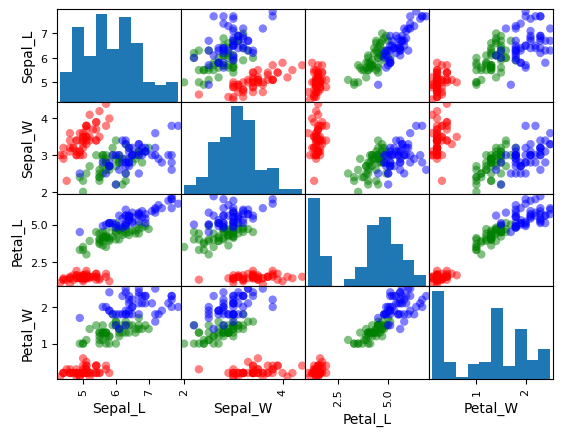

In [18]:
X_df = pd.DataFrame(X, columns=['Sepal_L', 'Sepal_W', 'Petal_L', 'Petal_W'])
my_cols_dict = {0: 'red', 1: 'green', 2: 'blue'}
my_cols = pd.Series(Y).apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(X_df, c = my_cols, marker='o', alpha = 0.5)
plt.show()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [20]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
Y_pred_test = GNB.predict(X_test)

In [21]:
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test)
print(conf_mat)

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [23]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_test)
print(str(np.round(accuracy, 3)))

0.956


In [26]:
centers = GNB.theta_
variances = GNB.var_
columns = ['Sepal_L', 'Sepal_W', 'Petal_L', 'Petal_W']

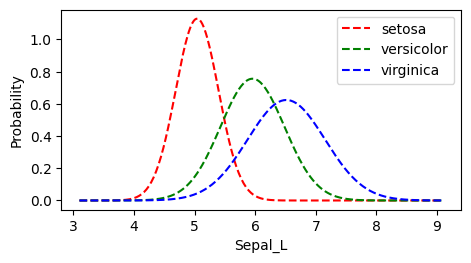

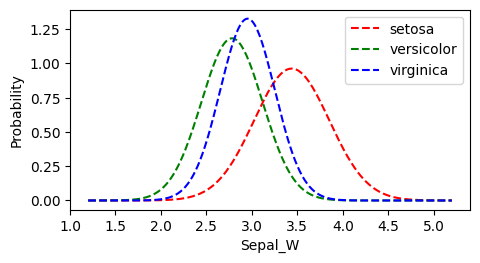

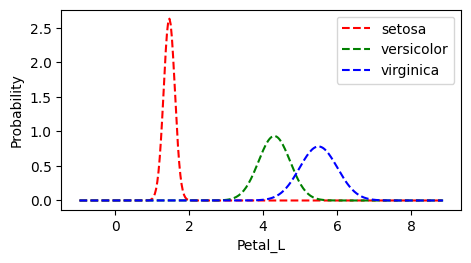

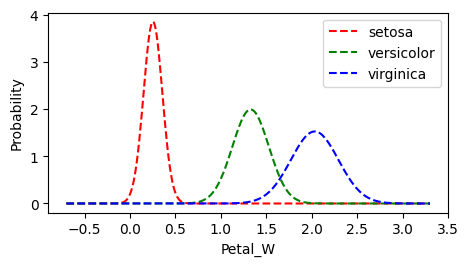

In [ ]:
for i in range(4):
    x_min = X[:, i].min()
    x_max = X[:, i].max(),
    x_range = x_max - x_min
    x_grid = np.linspace(x_min - x_range/3, x_max + x_range/3, 300)
    fig = plt.figure(figsize=(4, 2), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
        center = centers[j, i]
        sigma = np.sqrt(variances[j, i])
        ax.plot(x_grid, st.norm.pdf(x_grid, loc = center, scale = sigma), color = my_cols_dict[j], linestyle = "--", label = labels[j])
    ax.legend(loc = 0)
    plt.show()